---
# Übungszettel 10, Python Aufgabe
---

**ausgegeben am Mi 24.6.2020 12 Uhr, abzugeben bis Mi 1.7.2020 12 Uhr**

Bearbeitet von: Justus Multhaup

Zusammenarbeit mit: anderer Name oder leer

Übungsgruppe: Laura Strampe

---

**Einführung**: In der Vorlesung wurde der Hertzsche Dipol ausführlich behandelt. Die elektromagnetische Abstrahlung von diesem kann man, wenn auch mit einigem Aufwand, exakt berechnen. Für kompliziertere Antennengeometrien wird die Rechnung per Hand aber sehr schnell zu aufwendig. Wir wollen hier einen Schritt in Richtung numerische Antennensimulation machen um eine geläufige Antennenformen verständlich zu machen und die Maxwellgleichungen anzuwenden. Dabei wollen wir das elektrische Feld einer Antenne berechnen.

Speziell wollen wir eine häufig verbaute, einfache Antennenformen betrachten: die $\lambda/4$ Antenne:

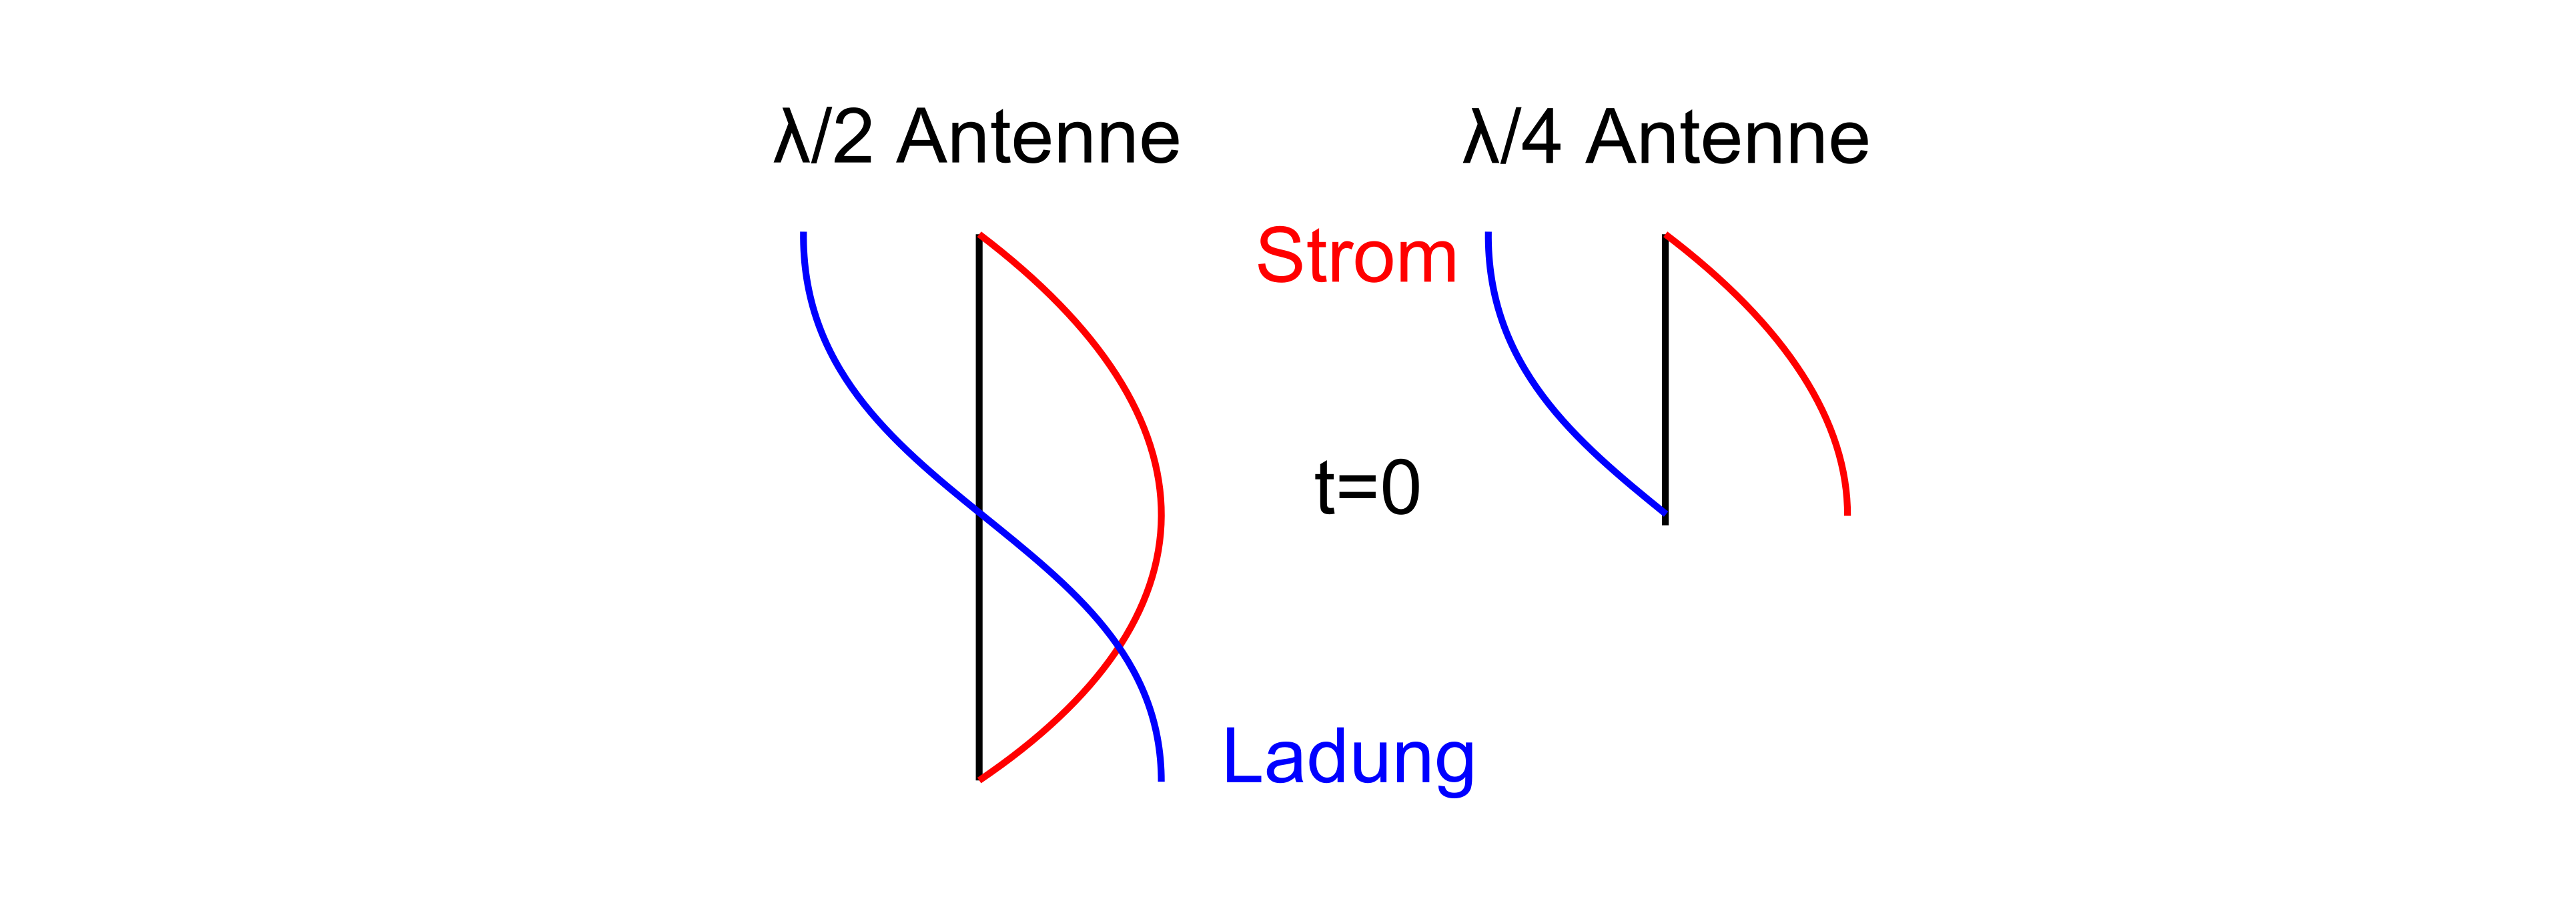

Antennen dieser Bauform werden über einen großen Bereich der Radiowellen eingesetzt, beispielsweise für den Radio-Empfang in Fahrzeugen, beim Funk mit Walkie-Talkies oder in Flugzeugen. 

In praktischen Antennensimulationen verwendet man oft clevere Berechungsmethoden um schnelle Simulationen bei komplexen Geometrien zu erhalten. Der Einfachheit halber wollen wir hier allerdings direkt mit den retardierten (also relativistisch verzögerten) Feldern arbeiten, die direkt aus den Maxwellgleichungen folgen. Dabei wollen wir einige Konzepte der vorhergehenden Übungszettel wiederholen.

**Aufgabe**: Das retardierte (relativistisch verzögerte) $\vec E$-Feld am Ort $\vec r$ zum Zeitpunkt $t$ folgt aus den Maxwellgleichungen und lässt sich schreiben als:

$$\vec{E}\left(\vec{r},t\right)=\frac{1}{4\pi\epsilon_{0}}\int\left[\frac{\rho\left(\vec{r}',t_{r}\right)}{R^{3}}\vec{R}+\frac{\dot{\rho}\left(\vec{r}',t_{r}\right)}{cR^{2}}\vec{R}-\frac{\dot{\vec{j}}\left(\vec{r}',t_{r}\right)}{c^{2}R}\right]\:\textrm{d}^{3}\vec{r}'$$

mit $\vec{R}=\vec{r}-\vec{r}'$ und der Kurzschreibweise für die Zeitableitung mit Hilfe des Punktes. $t_r$ ist hierbei die Zeitverzögerung $t_r = -R/c$.

Es ist also nötig über die Ladungen, die zeitliche Änderung der Ladungen und die zeitliche Änderung des Stromes zu integrieren. In unserem Fall haben wir nur einen Strom bzw. Ladungen entlang der $\lambda/4$-Antenne. Das heißt:

$$\rho\left(z\right)=\begin{cases}
\sin\left(2\pi\frac{z}{\lambda}\right)\cdot\exp\left(i\omega t\right) & 0<z<\frac{\lambda}{4},x=y=0\\
0 & \textrm{sonst}
\end{cases}$$

$$\vec{j}\left(z\right)=\begin{cases}
2\pi\frac{\hat{\vec{z}}}{\lambda}\cos\left(2\pi\frac{z}{\lambda}\right)\cdot\exp\left(i\omega t\right) & 0<z<\frac{\lambda}{4},x=y=0\\
0 & \textrm{sonst}
\end{cases}$$

Man beachte, dass wir hier, ähnlich wie bei dem LRC-Schwingkreis, mit komplexen Strömen und Ladungsdichten rechnen um später die Auswertung zu erleichtern.

1. Implementieren Sie die Ladungsdichte, deren zeitliche Ableitung und die Zeitableitung des Stroms als Funktion von `z` und `t`.

2. Schreiben Sie eine Funktion `dE(y,z,Z)` welche den Beitrag eines infinitesimalen Linienelements bei $z=$ `Z` auf der Antenne zum $\vec E$-Feld an der Stelle `y,z` berechnet.

3. Schreiben Sie eine Funktion `E(y,z)`, welche durch Integration entlang der Antenne (von 0 bis $\lambda/4$) von `dE` die `y`- und `z`-Komponente des elektrischen Felds an der Stelle `y,z` berechnet.

4. Bestimmen Sie das komplexe elektrische Feld auf einem Gitter von $y\times z = \left[\frac{\lambda}{2},\frac{11}{2}\lambda\right]\times\left[-3\lambda,3\lambda\right]$.

5. Schreiben Sie eine Funktion, welche den Realteil der elektrischen Feldstärke zu einem Zeitpunkt $t$ berechnet nach:
$\Re\left(\vec{E}\left(\vec{r},t\right)\cdot\exp\left(i\omega t\right)\right)$, wobei $\vec E \left(\vec{r},t\right)$ hier komplex ist.

6. Plotten Sie eine Animation des Realteils der Elektrischen Feldstärke als Animation über eine Periode.

**Vorgehensweise**: Wir empfehlen folgendes Vorgehen, dem Sie jedoch nicht folgen müssen:

1. Wir rechnen alles in Wellenlängen, das heißt, alle Ortseinheiten seien Vielfache der Wellenlänge $\lambda$. Damit ist $\omega=2 \pi \cdot c$ und ein wenig Schreibarbeit bleibt erspart.

2. Implementieren Sie die Ladungsdichte, deren zeitliche Ableitung und die Zeitableitung des Stroms als Funktion von `z` und `t`. Die zeitlichen Ableitungen sind dabei einfach analytisch berechenbar. Beachten Sie, dass Sie keine Fallunterscheidungen einbauen müssen, sondern nur die Integrationsgrenzen später richtig wählen müssen.

3. Schreiben Sie eine Funktion `dE(y,z,Z)` welche den Beitrag eines infinitesimalen Linienelements bei $z=$ `Z` auf der Antenne zum $\vec E$-Feld an der Stelle `y,z` berechnet. Für die Länge des Vektors $R$ können Sie beispielsweise die `numpy.linalg.norm()` Funktion nutzen.

4. Schreiben Sie eine Funktion `E(y,z)`, welche durch Integration entlang der Antenne (von 0 bis $\lambda/4$) von `dE` die `y`- und `z`-Komponente des elektrische Felds an der Stelle `y,z` berechnet. Dabei kann man die `scipy.integrate.quad_vec()` für die Integration nutzen. Damit die Funktion auf Gitter anwendbar ist, können Sie das `@numpy.vectorize` Makro verwenden.

5. Bestimmen Sie das komplexe elektrische Feld auf einem Gitter von $y\times z = \left[\frac{\lambda}{2},\frac{11}{2}\lambda\right]\times\left[-3\lambda,3\lambda\right]$. Das Gitter lässt sich über `numpy.meshgrid()` erzeugen.

6. Schreiben Sie eine Funktion, welche den Realteil der elektrischen Feldstärke zu einem Zeitpunkt $t$ berechnet nach:
$\Re\left(\vec{E}\left(\vec{r},t\right)\cdot\exp\left(i\omega t\right)\right)$, wobei $\vec E \left(\vec{r},t\right)$ hier komplex ist. Das bedeutet, dass die Funktion eine Zeit `t` übergeben bekommt, nach der gegebenen Formel das komplexe elektrische Feld berechnet und dann aus dessen Realteil den Betrag des realen Feldes berechnet.

7. Plotten Sie eine Animation des Realteils der Elektrischen Feldstärke über eine Periode. Nutzen Sie dafür `matplotlib.animation.FuncAnimation` und `contourf()`. Setzen Sie die `levels` von `contourf` auf immer den gleichen Wert und plotten Sie ausreichend viele Frames pro Periode um die Bewegung der Elektrischen Wellen richtig erkennen zu können.

**Hilfestellung**: Alle hier benutzten Funktionen sollten Sie schon mindestens einmal auf den vorherigen Übungszetteln verwendet haben. 

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


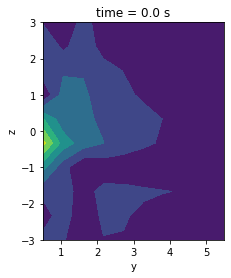

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad_vec
from matplotlib.animation import FuncAnimation
eps0 = 8.854e-12
c = 2.998e10
w = 2*np.pi*c

###Funktion für rho, drhodt und djdt
def states(z,t):
    w = 2*np.pi*c ##Frequenz
    return np.sin(2*np.pi*z)*np.exp(1j*w*t), 1j*w*np.sin(2*np.pi*z)*np.exp(1j*w*t), np.array([0,0,1])*1j*w*2*np.pi*np.cos(2*np.pi*z)*np.exp(1j*w*t)


##Funktion für dE an Stelle y,z
def dE(y,z,Z):
    w = 2*np.pi*c ##Frequenz
    Rv = np.array([0,y,z]) - np.array([0,0,Z])
    R = np.linalg.norm(Rv) ##Betrag von R
    tr = -R/c ##Zeitverzögerung
    state = states(Z,tr)
    return 1/(4*np.pi*eps0)*(state[0]/R**3*Rv + state[1]/(c*R**2)*Rv - state[2]/(c**2*R))

@np.vectorize
def E(y,z):
    result = quad_vec(lambda Z: dE(y,z,Z),0.0,1/4)[0]
    return result[1], result[2]

    
y = np.linspace(1/2,11/2,10)
z = np.linspace(-3,3,10)

ry, rz = np.meshgrid(y,z)


def real(y,z,t):
    res = np.array([E(y,z)[0]*np.exp(1j*w*t), E(y,z)[1]*np.exp(1j*w*t)])
    return np.sqrt(res[0].real**2+res[1].real**2)


T = 2*np.pi/w

t = np.linspace(0,T,100)

fig = plt.figure()
ax = plt.axes(xlim=[np.min(ry),np.max(ry)],ylim=[np.min(rz),np.max(rz)])
ax.set_aspect('equal')

def animate(i):
    # clear graph
    ax.clear()
    # reset limits
    ax.set_xlim([np.min(ry),np.max(ry)])
    ax.set_ylim([np.min(rz),np.max(rz)])

    # plot line
    ax.contourf(ry,rz, real(ry,rz,t[i]))
    
    # add title etc.
    plt.title(f'time = {t[i]} s')
    plt.ylabel('z')
    plt.xlabel('y')
   

    
anim = FuncAnimation(fig, animate, frames=100, interval = 10)
anim.save('Efeld.gif', writer='imagemagick')